In [77]:
import pandas as pd
import numpy as np
#from filterpy.kalman import KalmanFilter
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\time series va do an\TH1_TTNT\train.csv')
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


# 1. Tiền xử lí dữ liệu

In [78]:
df.count()

id                             750000
Podcast_Name                   750000
Episode_Title                  750000
Episode_Length_minutes         662907
Genre                          750000
Host_Popularity_percentage     750000
Publication_Day                750000
Publication_Time               750000
Guest_Popularity_percentage    603970
Number_of_Ads                  749999
Episode_Sentiment              750000
Listening_Time_minutes         750000
dtype: int64

=> Dữ liệu tại 2 thuộc tính Episode_Length_minutes và Guest_Popularity_percentage bị thiếu nhiều

In [79]:
df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

=> Trực quan hóa dữ liệu bị thiếu 

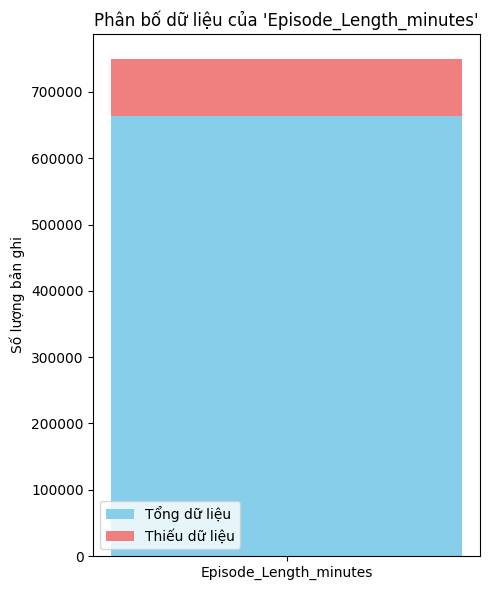

In [80]:
# Chọn cột cần kiểm tra
column = "Episode_Length_minutes"

# Tính số lượng dữ liệu
total = len(df)
missing = df[column].isnull().sum()
non_missing = total - missing

# Dữ liệu cho biểu đồ
data = [non_missing, missing]
labels = ["Có dữ liệu", "Thiếu dữ liệu"]
colors = ["skyblue", "lightcoral"]

# Vẽ biểu đồ
plt.figure(figsize=(5, 6))
plt.bar(column, total, color='skyblue', label="Tổng dữ liệu")
plt.bar(column, missing, bottom=non_missing, color='lightcoral', label="Thiếu dữ liệu")

# Thêm chú thích
plt.title(f"Phân bố dữ liệu của '{column}'")
plt.ylabel("Số lượng bản ghi")
plt.legend()
plt.tight_layout()
plt.show()

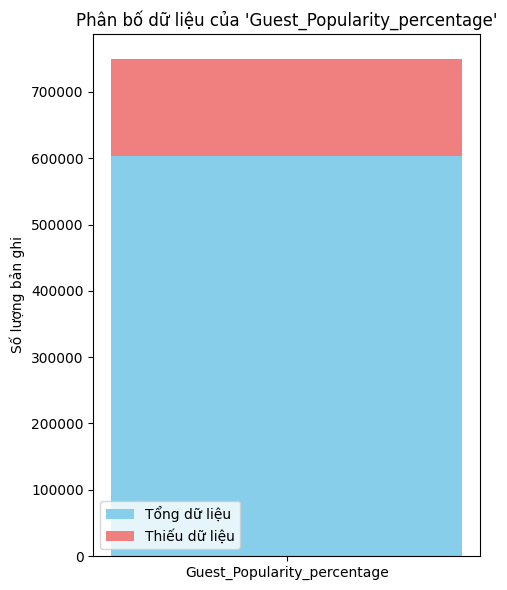

In [81]:
# Chọn cột cần kiểm tra
column = "Guest_Popularity_percentage"

# Tính số lượng dữ liệu
total = len(df)
missing = df[column].isnull().sum()
non_missing = total - missing

# Dữ liệu cho biểu đồ
data = [non_missing, missing]
labels = ["Có dữ liệu", "Thiếu dữ liệu"]
colors = ["skyblue", "lightcoral"]

# Vẽ biểu đồ
plt.figure(figsize=(5, 6))
plt.bar(column, total, color='skyblue', label="Tổng dữ liệu")
plt.bar(column, missing, bottom=non_missing, color='lightcoral', label="Thiếu dữ liệu")

# Thêm chú thích
plt.title(f"Phân bố dữ liệu của '{column}'")
plt.ylabel("Số lượng bản ghi")
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
df["Episode_Length_minutes"] = df["Episode_Length_minutes"].interpolate(method='linear')

In [83]:
df["Guest_Popularity_percentage"] = df.groupby("Genre")["Guest_Popularity_percentage"]\
                                       .transform(lambda x: x.fillna(x.median()))

In [84]:
df["Number_of_Ads"].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13540\1031645436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Number_of_Ads"].fillna(0,inplace=True)


In [85]:
df.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         1
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

# Dữ liệu sau khi đã tiền xử lí

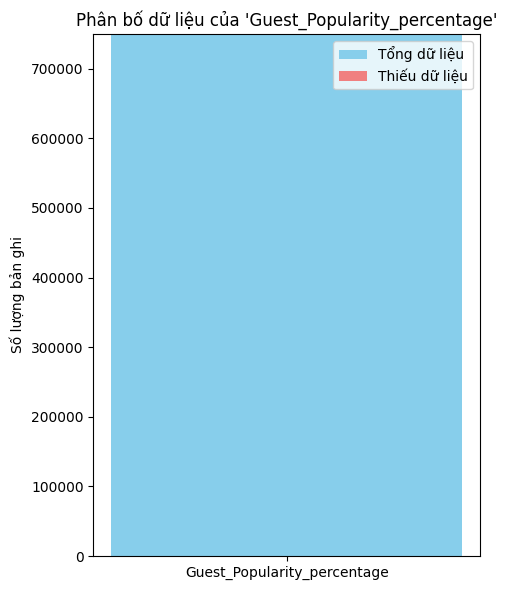

In [86]:
# Chọn cột cần kiểm tra
column = "Guest_Popularity_percentage"

# Tính số lượng dữ liệu
total = len(df)
missing = df[column].isnull().sum()
non_missing = total - missing

# Dữ liệu cho biểu đồ
data = [non_missing, missing]
labels = ["Có dữ liệu", "Thiếu dữ liệu"]
colors = ["skyblue", "lightcoral"]

# Vẽ biểu đồ
plt.figure(figsize=(5, 6))
plt.bar(column, total, color='skyblue', label="Tổng dữ liệu")
plt.bar(column, missing, bottom=non_missing, color='lightcoral', label="Thiếu dữ liệu")

# Thêm chú thích
plt.title(f"Phân bố dữ liệu của '{column}'")
plt.ylabel("Số lượng bản ghi")
plt.legend()
plt.tight_layout()
plt.show()

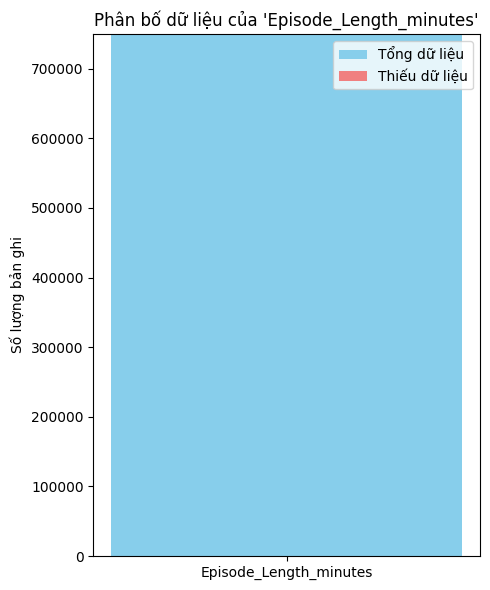

In [87]:
# Chọn cột cần kiểm tra
column = "Episode_Length_minutes"

# Tính số lượng dữ liệu
total = len(df)
missing = df[column].isnull().sum()
non_missing = total - missing

# Dữ liệu cho biểu đồ
data = [non_missing, missing]
labels = ["Có dữ liệu", "Thiếu dữ liệu"]
colors = ["skyblue", "lightcoral"]

# Vẽ biểu đồ
plt.figure(figsize=(5, 6))
plt.bar(column, total, color='skyblue', label="Tổng dữ liệu")
plt.bar(column, missing, bottom=non_missing, color='lightcoral', label="Thiếu dữ liệu")

# Thêm chú thích
plt.title(f"Phân bố dữ liệu của '{column}'")
plt.ylabel("Số lượng bản ghi")
plt.legend()
plt.tight_layout()
plt.show()

2.

# 1. Kalman filter cơ bản

Ước lượng Listening_Time_minutes dựa trên mô hình trạng thái đơn giản.

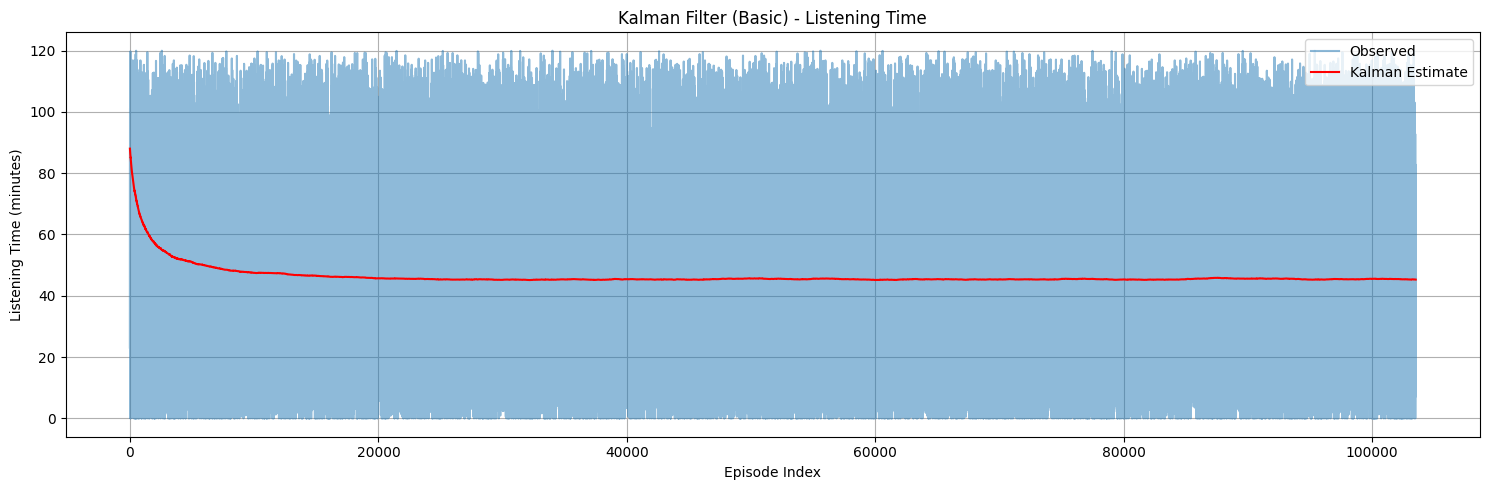

In [88]:
# Giá trị thực tế
observations = df[df['Publication_Day'] == 'Saturday']['Listening_Time_minutes'].dropna().values
n = len(observations)
# kalman param
Q = 1e-5
R = np.var(observations - np.mean(observations))
xhat1 = np.zeros(n)
P = np.zeros(n)
xhat1minus = np.zeros(n)
Pminus = np.zeros(n)
K = np.zeros(n)

# Giá trị khởi tạo
xhat1[0] = observations[0]
P[0] = 1.0

for k in range(1, n):
    xhat1minus[k] = xhat1[k-1]
    Pminus[k] = P[k-1] + Q
    K[k] = Pminus[k] / (Pminus[k] + R)
    xhat1[k] = xhat1minus[k] + K[k] * (observations[k] - xhat1minus[k])
    P[k] = (1 - K[k]) * Pminus[k]

# result
plt.figure(figsize=(15, 5))
plt.plot(observations, label='Observed', alpha=0.5)
plt.plot(xhat1, label='Kalman Estimate', color='red')
plt.title('Kalman Filter (Basic) - Listening Time')
plt.xlabel('Episode Index')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Kalman filter with Trend

mô hình này không chỉ theo dõi giá trị hiện tại mà còn ước lượng được xu hướng

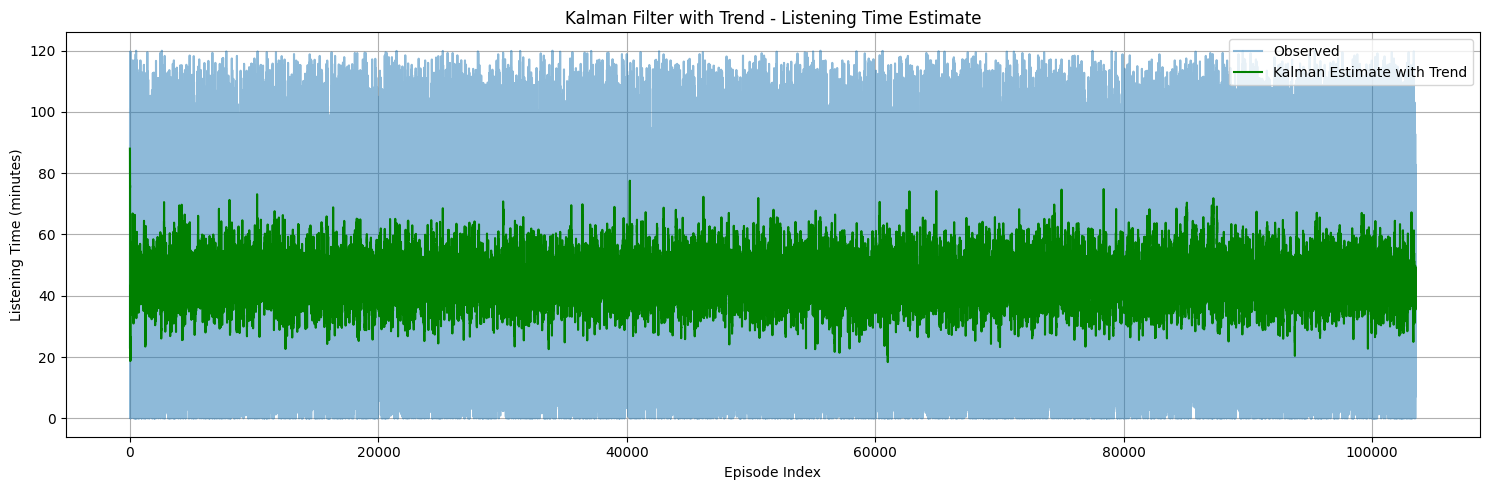

In [89]:
# Giá trị thực tế
observations = df[df['Publication_Day'] == 'Saturday']['Listening_Time_minutes'].dropna().values
n = len(observations)

# Ma trận hệ số
A = np.array([[1, 1], [0, 1]])  # Trạng thái gồm giá trị và xu hướng
H = np.array([[1, 0]])          # Chỉ quan sát giá trị

# Khởi tạo các biến
x_est = np.zeros((n, 2))        # Trạng thái ước lượng [giá trị, xu hướng]
P = np.zeros((n, 2, 2))         # Ma trận hiệp phương sai
Q = np.eye(2) * 0.01            # Nhiễu quá trình
R = np.array([[np.var(observations)]])  # Nhiễu quan sát
I = np.eye(2)

# Giá trị ban đầu
x_est[0] = [observations[0], 0]
P[0] = np.eye(2)

# Thuật toán Kalman
for k in range(1, n):
    # Dự đoán
    x_pred = np.dot(A, x_est[k-1])
    P_pred = np.dot(np.dot(A, P[k-1]), A.T) + Q

    # Kalman Gain
    S = np.dot(np.dot(H, P_pred), H.T) + R
    K = np.dot(np.dot(P_pred, H.T), np.linalg.inv(S))

    # Cập nhật
    y = observations[k] - np.dot(H, x_pred)
    x_est[k] = x_pred + K.flatten() * y
    P[k] = np.dot((I - np.dot(K, H)), P_pred)

# result
plt.figure(figsize=(15, 5))
plt.plot(observations, label='Observed', alpha=0.5)
plt.plot(x_est[:, 0], label='Kalman Estimate with Trend', color='green')
plt.title('Kalman Filter with Trend - Listening Time Estimate')
plt.xlabel('Episode Index')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Kalman filter mở rộng với biến quan sát phụ

- Dùng thêm biến quan sát phụ (không chỉ dùng Listening_Time_minutes nữa)
- Chọn Episode_Length_minutes vì thời lượng tập podcast có thể ảnh hưởng đến thời gian nghe.

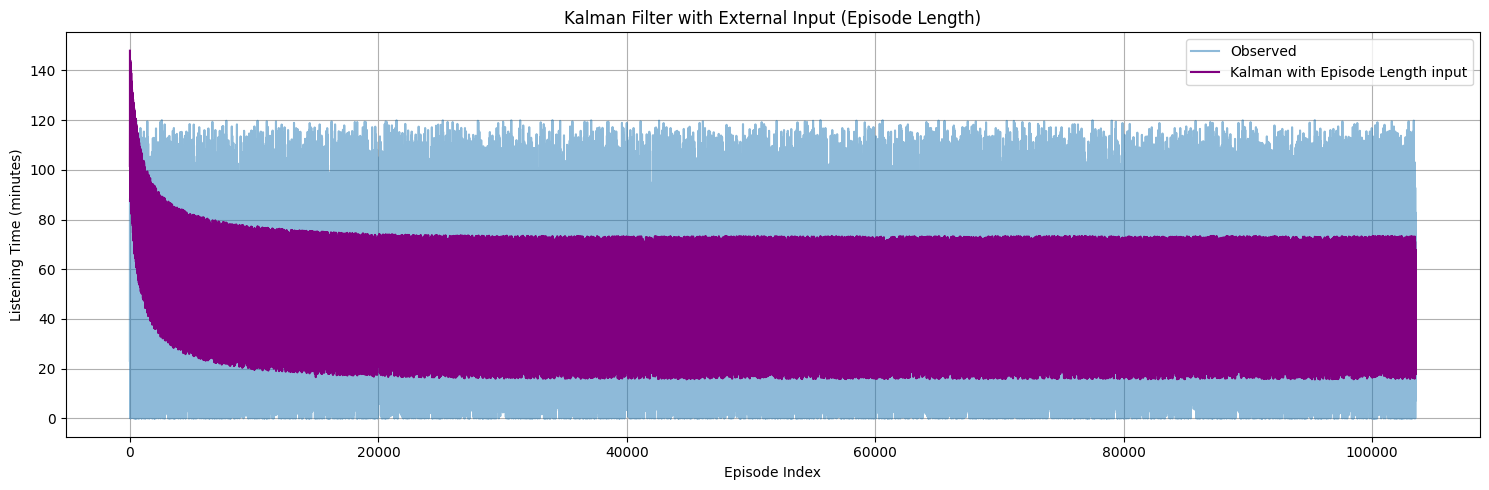

In [90]:
# Lấy dữ liệu
obs = df[df['Publication_Day'] == 'Saturday'][['Listening_Time_minutes', 'Episode_Length_minutes']].dropna()
z = obs['Listening_Time_minutes'].values
u = obs['Episode_Length_minutes'].values
n = len(z)

# Khởi tạo tham số
xhat = np.zeros(n)  # trạng thái ẩn
P = np.zeros(n)     # hiệp phương sai
Q = 1e-5            # nhiễu quá trình
R = np.var(z)       # nhiễu quan sát
H = 1.0             # hệ số trạng thái
B = 0.5             # hệ số tác động của biến phụ
xhat[0] = z[0]
P[0] = 1.0

# Kalman Filter có input phụ
for k in range(1, n):
    # Dự đoán
    xhat_minus = xhat[k-1]
    P_minus = P[k-1] + Q

    # Tính sai số đo
    y = z[k] - (H * xhat_minus + B * u[k])  # residual

    # Kalman Gain
    K = P_minus * H / (H * P_minus * H + R)

    # Cập nhật
    xhat[k] = xhat_minus + K * y
    P[k] = (1 - K * H) * P_minus

# result
plt.figure(figsize=(15, 5))
plt.plot(z, label='Observed', alpha=0.5)
plt.plot(xhat + B * u, label='Kalman with Episode Length input', color='purple')
plt.title('Kalman Filter with External Input (Episode Length)')
plt.xlabel('Episode Index')
plt.ylabel('Listening Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Đánh giá mô hình

In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

z = df['Listening_Time_minutes'].dropna().values
u = df['Episode_Length_minutes'].dropna().values

# Đồng bộ độ dài tối thiểu giữa z, u, xhat1, x_est, xhat
min_len = min(len(z), len(u), len(xhat1), len(x_est), len(xhat))

z = z[:min_len]
u = u[:min_len]
kalman1 = xhat1[:min_len]
kalman2 = x_est[:min_len, 0]
kalman3 = xhat[:min_len] + B * u[:min_len]

# Đánh giá từng mô hình
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n   MSE = {mse:.4f}\n   MAE = {mae:.4f}\n   R2 = {r2:.4f}")

print("Đánh giá các mô hình Kalman:")
evaluate_model("Kalman 1 - Cơ bản", z, kalman1)
evaluate_model("Kalman 2 - Xu hướng", z, kalman2)
evaluate_model("Kalman 3 - Có biến phụ", z, kalman3)


Đánh giá các mô hình Kalman:
Kalman 1 - Cơ bản:
   MSE = 746.1656
   MAE = 22.7889
   R2 = -0.0161
Kalman 2 - Xu hướng:
   MSE = 783.6280
   MAE = 23.2009
   R2 = -0.0671
Kalman 3 - Có biến phụ:
   MSE = 981.7514
   MAE = 25.4003
   R2 = -0.3369
